/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (3).

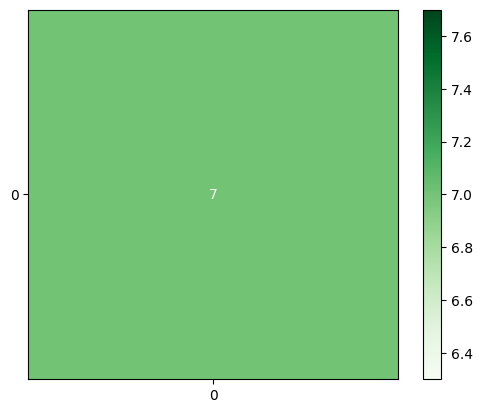

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ---- Step 1: Dataset ----
data = {
    "No": list(range(1, 33)),
    "Name": [
        "FARHIN","URMI","FIHA","MISTY","TITHI","FAHIMA","NAIMUR","HAMEEM",
        "RIJON","SANI","SUMU","ARPA","RADIBA","AISHI","NAZIA","FIFI","SHAHRIN",
        "RAHMAN","SHANNI","SADIA","NAHID","ARIYAN","SABIA","SHAKIA","NAFISA",
        "SULTANA","EUSHA","MEHNAZ","OISHI","SADEK","WAHID","TORY"
    ],
    "Accuracy": [
        98.1,100,90.1,97.0,93.1,95.4,98.5,97.5,97.8,94.9,90.7,100,98.1,34.3,99.1,
        98.9,99.1,99.3,97.8,97.6,96.7,98.7,98.1,97.4,100,97.8,100,100,99.4,97.6,
        99.2,99.3
    ],
    "ReactionTime": [
        1.71,1.64,1.99,1.81,1.81,1.68,1.37,1.49,0.97,1.52,1.53,1.77,3.34,1.68,
        1.66,1.97,1.69,1.29,1.01,1.47,0.93,1.15,3.34,2.36,1.58,1.34,1.44,1.72,
        1.09,1.08,1.52,1.36
    ]
}
df = pd.DataFrame(data)

# ---- Step 2: Preprocess ----
X = df[["Accuracy", "ReactionTime"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- Step 3: KMeans for labels ----
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# ---- Step 4: Train-Test Split ----
X_train, X_test, y_train, y_test = train_test_split(X, df["Cluster"], test_size=0.2, random_state=42)

# ---- Step 5: Train Decision Tree ----
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# ---- Step 6: Predictions ----
y_pred = dt_model.predict(X_test)

# ---- Step 7: Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix for Decision Tree on KMeans-labeled Data")
plt.show()

# ---- Step 8: Report ----
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
